# Coding assignments in ChatGPT/Cursor era

In the era of SWE-bench and various arenas for LLMs, the question "can LLMs code?" is obsolete.
Of course, they can and I personally use ChatGPT and Sonnet4 daily. They are good. 

Now, the real question is -- if the LLMs are so good, why students are struggling with coding assignments for computer vision course every year? Does Chat have any problem with coding the gaussian blur? Are students very honest and not using it at all? Are they using LLMs, but something is wrong?

Those are the questions, which I have tried to answer last semester. 

### What is (part of) the course about? Image matching

I do the lectures and labs on the image matching part of the computer vision. During the series of 5 assignments, students have to implement:

1. Gaussian blurring and patch extraction
2. (Multiscale) Harris corner detector
3. SIFT descriptor and patch dominant orientation estimation
4. SNN matching and homography RANSAC
5. Assemble altogether into image matching pipeline.

Students have got the [lectures with a theory](https://cw.fel.cvut.cz/wiki/courses/mpv/start), [course wiki with task descriptions](https://cw.fel.cvut.cz/wiki/courses/mpv/labs/2_correspondence_problem/start) and [assignment templates](https://github.com/ducha-aiki/mpv-templates-backup) with API of the functions they have to implement. Most of the assignments are evaluated automatically by unit-tests and benchmarks on university server.

In the end, result should look like this (the widgets are provided with templates).
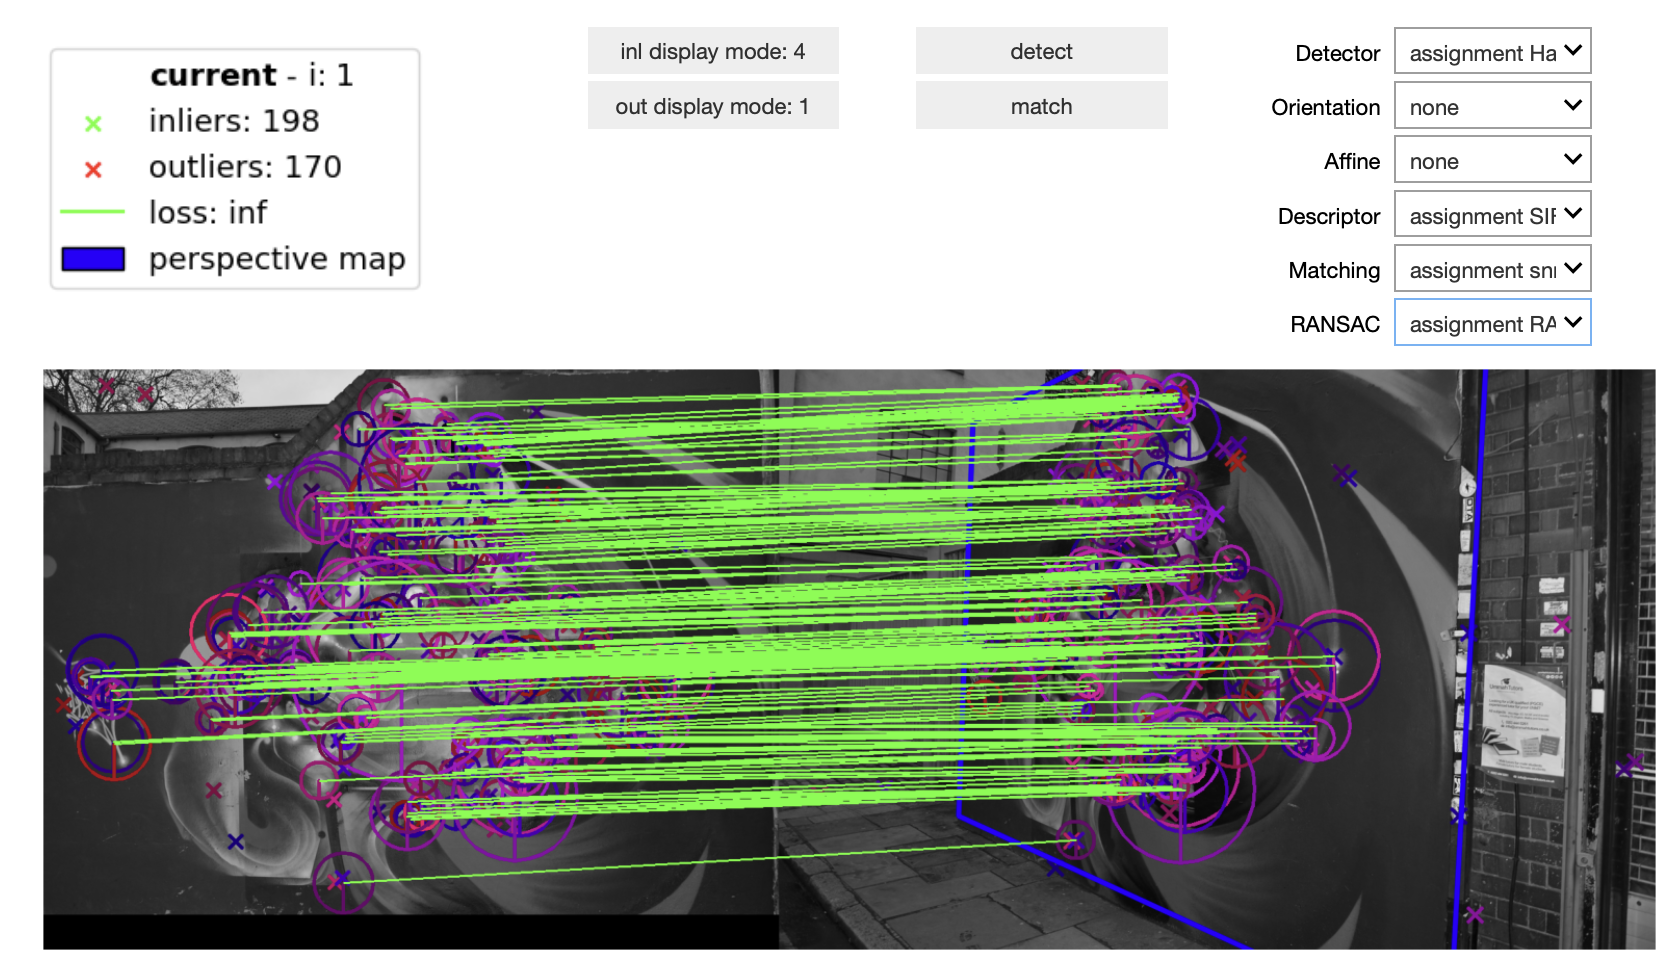

### How to test LLMs for this?

Obviously, there are many possible ways of doing it. I have selected the following:
I copy-paste 3 verbatims in a single message. The structure is :

- Please, implement {`ASSIGNMENT-DESCRIPTION`}
- {`ALL-ASSIGNMENT-RELATED-PAGE`}
- Code template: {`TEMPLATE.PY`}

This would be (almost) fair to an LLM, as it would have the same information, as the student, except the images. It also would imitate a prompt from a reasonable, but lazy student. 


An real (shortened) example would be:

#### Example prompt


```
Please, implement imagefiltering.py - file with the following methods implemented:
gaussian1d, gaussian_deriv1d - functions for computing Gaussian function and its first derivative.

```
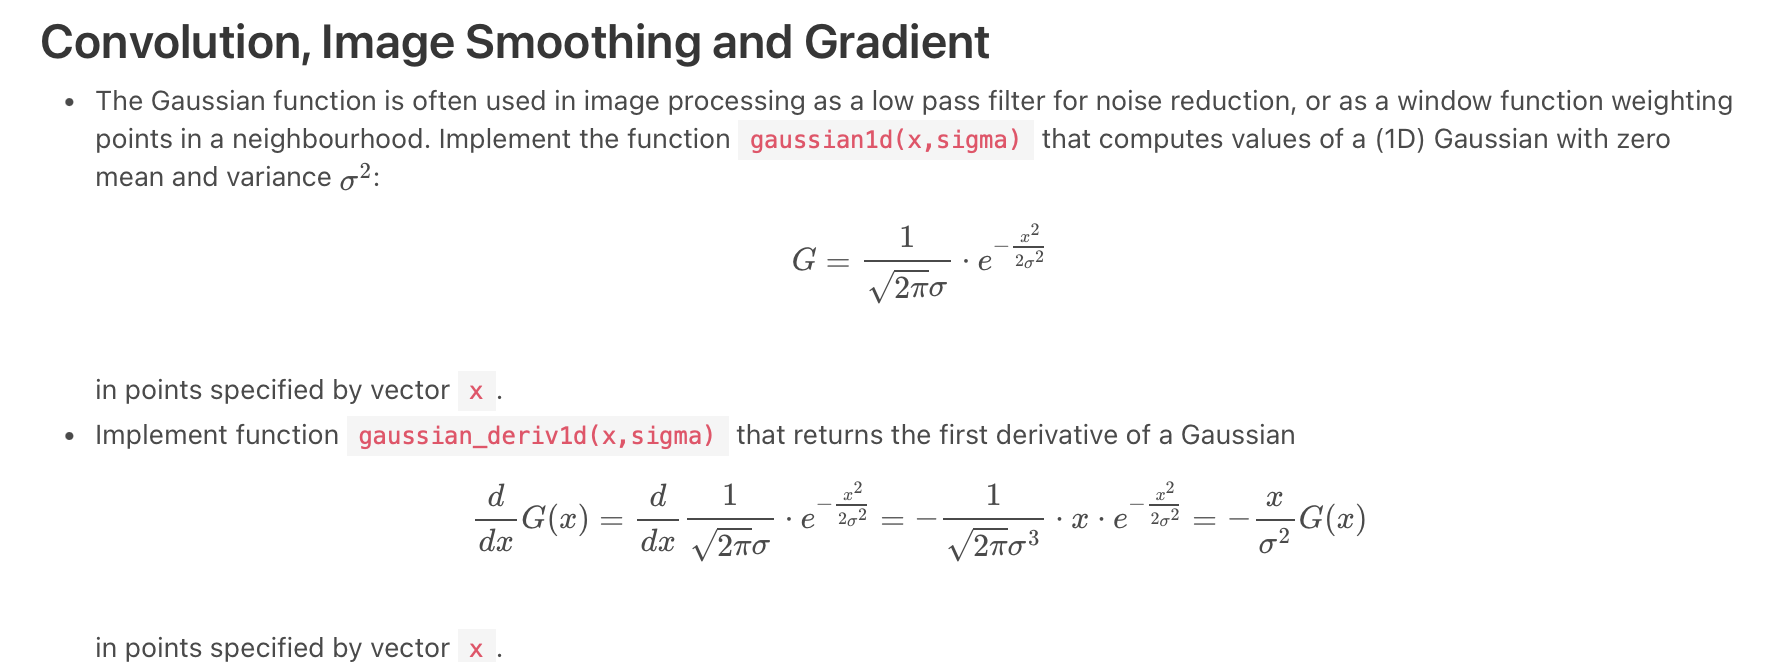

```python
import numpy as np
import math
import torch
import torch.nn.functional as F
import typing


def get_gausskernel_size(sigma, force_odd = True):
    ksize = 2 * math.ceil(sigma * 3.0) + 1
    if ksize % 2  == 0 and force_odd:
        ksize +=1
    return int(ksize)


def gaussian1d(x: torch.Tensor, sigma: float) -> torch.Tensor: 
    '''Function that computes values of a (1D) Gaussian with zero mean and variance sigma^2'''
    out =  torch.zeros(x.shape)
    return out


def gaussian_deriv1d(x: torch.Tensor, sigma: float) -> torch.Tensor:  
    '''Function that computes values of a (1D) Gaussian derivative'''
    out =  torch.zeros(x.shape)
    return out
```

## Evaluation

During the course of the semester, I have prompted the **4o**, **o3mini**, **o3 mini-hight**, and **o1** OpenAI models the same way, saved the `.py` file and uploaded it to the automatic evaluation system. 
When the current assignment required the functions from the previous weeks, I imported the ground truth solution -- assuming that the students could perfect them via multiple attempts (we allow up to ~50 attempts to reupload homework).

Here are the results (I added GPT5 later):


| Model/task          |  4o | o3-mini | o3-mini-high |  o1 | GPT5-Instant | GPT5-Thinking | Maximum |
| :------------------ | --: | :-----: | :----------: | :-: | :----------: | :-----------: | :-----: |
| Image filtering     |   3 |    5    |      2       |  6  |      6       |    **7**      | **7**   |
| Harris detector     |   4 |    5    |      5       |  6  |      6       |      6        | **7**   |
| SIFT descriptor     |   2 |    4    |      0       |  3  |   **4**      |   **4**       | **4**   |
| Matching and RANSAC |   3 |  7 |    7     |  6  |   **8**      |      3        | **8**   |
| **Total points**    | 12  | 21      | 14           | 21  | **24**           | 20            | **26**  |
| **Percentage \[%']**  | 46  | 81      | 54           | 81  | **92**           | 77            | **100** |


Overall, LLMs did better, than an average student on their first attempt. If prompted with scores and errors, they were pretty good at fixing their mistakes. 
This makes me wonder, why people, who obviously used LLM for their assignment still struggle to get high scores. And those, who get the highest scores are mostly NOT using LLMs, given the style and the iterations required to get to the answer. 


Funny enough, the tasks, which students usually struggle with, gave LLMs hard times as well.  

For example, almost everyone missed the following sentence about strict maximum in the `nms2d` function description.

```
 (i.e. take to consideration all 8 points in the 3×3 neigborhood and output non-zero only if the center is strictly larger than the neighborhood)
```


Two of the tasks are actually benchmark based -- patch orientation datection, and SIFT patch descriptor.
Here are the results:

| Benchmark/model       |   4o  | o3-mini | o3-mini-high |   o1   | GPT5-Instant | GPT5-Thinking | Reference Implementation |
| :-------------------- | :---: | :-----: | :----------: | :----: | :----------: | :-----------: | :----------------------: |
| Ang. Error [deg]      | fail  |  12.30  |   timeout    | 22.10  |     14.1     |     **4.20**      |           **1.1**            |
| SIFT mAP \[%\]              | fail  | 64.8  |   timeout    |  fail  |    68.4    |     **73**      |           71.7            |


Originally I wanted to evaluate all CV tasks from our course -- including retrieval, CNN training, tracking. However, dirung the semester, OpenAI has been updating and changing their models a couple of times, and I lost the motivation to redo the work.


## Conclusion?

I believe, modern LLMs -- even if in "single attempt" mode could easily ace university coding assignemnt. Even more so in "agentic" mode. Relying on ban for LLM usage is futile. Instead we should ask questions like - how do we teach people to do software engineering, and especially deep understanding of the algorithms in the ChatGPT era. 
The emphasis here on the understanding and the final result - good engineer, and not on the stupid things like "how can we prevent students from using LLMs". We cannot. 

What is troubling to me, is when student could not get good results even with ChatGPT help. 